In [18]:
from stdmodandoption import *

wanted='nsrad'
dirneed = ['m11bmhdcv']
the_prefix = 'snapshot'
the_suffix = '.hdf5'


if wanted=='sfrrad' or wanted=='nsrad' or wanted == 'cumnsmrad':
    withinr = 15.
    minr = 0.5
    maxlength=0.25
    usecen=0
    normalized=1
    usenscen=1
    usesphrad=1
    uselog=1
    Myrneed=600
    ageneed=200 #Myr
    radlist = np.linspace(minr, withinr,10)
    for runtodo in dirneed:
        info=SSF.outdirname(runtodo, Myrneed)
        rundir=info['rundir']
        runtitle=info['runtitle']
        slabel=info['slabel']
        snlabel=info['snlabel']
        dclabel=info['dclabel']
        resolabel=info['resolabel']
        the_snapdir=info['the_snapdir']
        Nsnapstring=info['Nsnapstring']
        havecr=info['havecr']
        haveB=info['haveB']
        Fcal=info['Fcal']
        iavesfr=info['iavesfr']
        timestep=info['timestep']
        color=info['color']
        h0=info['h0']
        cosmo=info['cosmo']
        usepep=info['usepep']
        maindir=info['maindir']
        snumadd=info['snumadd']
        halostr=info['halostr']
        rotface = 1
        loccen = 1
        S = SSF.readsnapwcen(the_snapdir, Nsnapstring, 4, snapshot_name=the_prefix, extension=the_suffix,\
         havecr=havecr,h0=h0,cosmo=cosmo, usepep=usepep, maindir=maindir,snumadd=snumadd,rotface=rotface,\
         loccen=loccen,runtodo=runtodo,rundir=rundir,halostr=halostr)
        Sage = S['age']
        Spos = S['p']
        Sx = Spos[:,0]
        Sy = Spos[:,1]
        Sz = Spos[:,2]
        Sm = S['m']
        agecutlow = np.amax(Sage)-0.001*ageneed
        agecuthigh = np.amax(Sage)
        cuta = (Sage> agecutlow) & (Sage <agecuthigh)
        Sx=Sx[cuta]; Sy=Sy[cuta]; Sz=Sz[cuta]; Sm=Sm[cuta];
        G = SSF.readsnapwcen(the_snapdir, Nsnapstring, 0, snapshot_name=the_prefix, extension=the_suffix,\
         havecr=havecr,h0=h0,cosmo=cosmo, usepep=usepep, maindir=maindir,snumadd=snumadd,rotface=rotface,\
         loccen=loccen,runtodo=runtodo,rundir=rundir,halostr=halostr)

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

import cameron_functions as CAMF
Gmas = G['m']; Gnh = G['nh']; KernalLengths = G['h']; density = G['rho']; Gmetal = G['z'];
camdict = CAMF.calnH(Gmas,Gnh,KernalLengths,density,Gmetal)

np.amax(camdict['fHI'])
np.amin(camdict['fHI'])
fHI = camdict['fHI']
fH2 = camdict['fH2']

Gp = G['p'];
Gx = Gp[:,0]; Gy = Gp[:,1]; Gz = Gp[:,2];
Gv = G['v']; 
Gvx = Gv[:,0]; Gvy = Gv[:,1]; Gvz = Gv[:,2];

rundir /m11b/mhdcv/
loading file : /home/tkc004//oasis/philruns///m11b/mhdcv///output//snapshot_600.hdf5
npart_file:  [12715149 12771424 19289221        0    56276        0]
npart_total: [12715149 12771424 19289221        0    56276        0]
flag_cooling 1
this time 1.0
hubble 0.702
atime 1.0
loading file : /home/tkc004//oasis/philruns///m11b/mhdcv///output//snapshot_600.hdf5
npart_file:  [12715149 12771424 19289221        0    56276        0]
npart_total: [12715149 12771424 19289221        0    56276        0]
flag_cooling 1
xvcen, yvcen, zvcen -222.36 -329.91 -224.73
rundir /m11b/mhdcv/
Gvx,Gvy,Gvz -0.2657360055088194 -1.3031342649588624 0.4440711562934072
loading file : /home/tkc004//oasis/philruns///m11b/mhdcv///output//snapshot_600.hdf5
npart_file:  [12715149 12771424 19289221        0    56276        0]
npart_total: [12715149 12771424 19289221        0    56276        0]
flag_cooling 1
this time 1.0
hubble 0.702
atime 1.0
loading file : /home/tkc004//oasis/philruns///m11b/mhdcv/

In [19]:
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

zat = 0
dz = 5
Gr = np.sqrt(Gx*Gx+Gy*Gy+Gz*Gz)
cutr = (Gr<10)*(Gr>0)
cutz = (Gz-zat<dz)*(Gz-zat>-dz)
cutx = (Gx<5.0)*(Gx>4.0)
cuty = (Gy<5.0)*(Gy>4.0)
#cut = cutr*cutz*cutx
cut = cutx*cuty*cutz
hist, bin_edges = np.histogram(Gvz[cut], density=True, bins=np.linspace(-80,80,num=100),weights=Gmas[cut]*fHI[cut])
x = 0.5*(bin_edges[1:]+bin_edges[:-1]); y = hist;
sigma=10; mean=0;
popt,pcov = curve_fit(gaus,x,y,p0=[0.0175,mean,sigma])

In [20]:
popt

array([ 0.10505309,  0.51042256, -3.40229498])

In [21]:
print np.average(Gvz[cut],weights=Gmas[cut])

print np.sqrt(np.average(np.square(Gvz[cut]-np.average(Gvz[cut],weights=Gmas[cut]*fHI[cut])),weights=Gmas[cut]*fHI[cut]))

1.1377425573358637
6.14031273535888


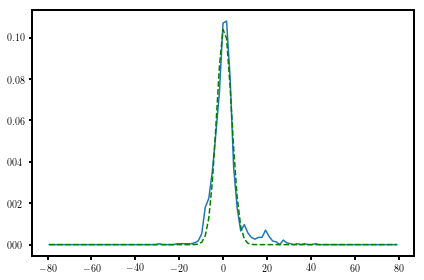

In [23]:
plt.plot(x,y)
plt.plot(x, gaus(x, *popt), 'g--')

In [85]:
x

array([-131.96482292, -112.26939294,  -92.57396296,  -72.87853299,
        -53.18310301,  -33.48767303,  -13.79224305,    5.90318693,
         25.59861691,   45.29404688,   64.98947686,   84.68490684,
        104.38033682,  124.0757668 ,  143.77119678,  163.46662675,
        183.16205673,  202.85748671,  222.55291669,  242.24834667])

In [12]:
from mockvelocitydispersion import calsigmaHIlos
xlist = np.linspace(13,15,num=2)
ylist = np.linspace(13,15,num=2)
maxlength=20
data = calsigmaHIlos(G,xlist,ylist,maxlength)

In [21]:
print data['sigmaHIlosgrid']

[12.7574752]


In [ ]:
Sdata = SSF.calsfr(S,tintval=0.01,cosmo=1,withinr=20)
sfrl = Sdata['sfrl']; Sxl = Sdata['Sxl']; Syl = Sdata['Syl']; Szl = Sdata['Szl']
newdata = calSFRsurdenxynew(sfrl,Sxl,Syl,Szl,xlist,ylist,maxlength)

/oasis/projects/nsf/csd478/tkc004/yt/yt-conda/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


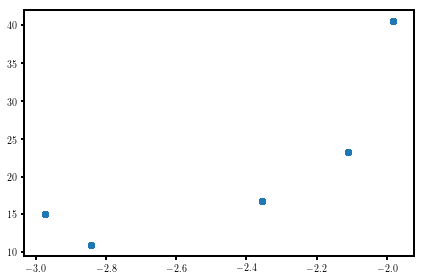

In [17]:
plt.scatter(np.log10(SFRdengrid), sigmaHIlosgrid)

/oasis/projects/nsf/csd478/tkc004/yt/yt-conda/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


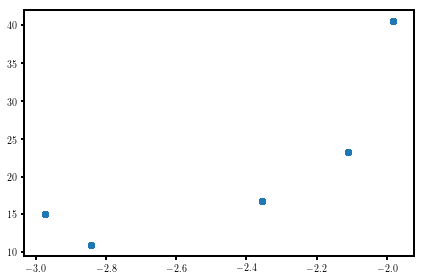

In [27]:
plt.scatter(np.log10(SFRdengrid), sigmaHIlosgrid)